# <span style="color: blue;">ให้กรอกรหัสนิสิต และชื่อ-นามสกุลของสมาชิกในทีม</span>
# <span style="color: blue;">(ห้ามมีสมาชิกเกิน 2 คน)</span>
## รหัสนิสิต ชื่อ-นามสกุล

## Backpropagation Exercise
In this exercise we will use backpropagation to train a multi-layer perceptron (with a single hidden layer).  We will experiment with different patterns and see how quickly or slowly the weights converge.  We will see the impact and interplay of different parameters such as learning rate, number of iterations, and number of data points.

In [1]:
#Preliminaries
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Fill out the code below so that it creates a multi-layer perceptron with a single hidden layer (with 4 nodes) and trains it via back-propagation.  Specifically your code should:

1. Initialize the weights to random values between -1 and 1
1. Perform the feed-forward computation
1. Compute the loss function
1. Calculate the gradients for all the weights via back-propagation
1. Update the weight matrices (using a learning_rate parameter)
1. Execute steps 2-5 for a fixed number of iterations
1. Plot the accuracies and log loss and observe how they change over time


Once your code is running, try it for the different patterns below.

- Which patterns was the neural network able to learn quickly and which took longer?
- What learning rates and numbers of iterations worked well?
- If you have time, try varying the size of the hidden layer and experiment with different activation functions (e.g. ReLu)

shape of x_mat_full is (4000, 3)
shape of y is (4000,)


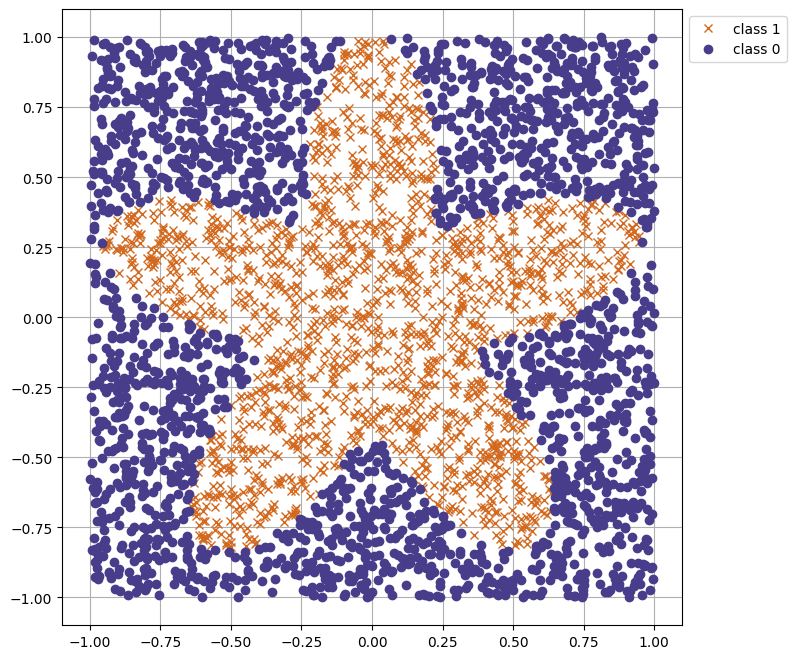

In [2]:
## This code below generates two x values and a y value according to different patterns
## It also creates a "bias" term (a vector of 1s)
## The goal is then to learn the mapping from x to y using a neural network via back-propagation

np.random.seed(12345)

num_obs = 4000
x_mat_1 = np.random.uniform(-1, 1, size=(num_obs, 2))
x_mat_bias = np.ones((num_obs, 1))
x_mat_full = np.concatenate((x_mat_1, x_mat_bias), axis=1)

# 5-petal flower shape
r = np.sqrt(x_mat_full[:, 0] ** 2 + x_mat_full[:, 1] ** 2)
theta = np.arctan2(x_mat_full[:, 1], x_mat_full[:, 0])
y = (r < (0.7 + 0.3 * np.sin(5 * theta))).astype(int)

print('shape of x_mat_full is {}'.format(x_mat_full.shape))
print('shape of y is {}'.format(y.shape))

fig,  ax = plt.subplots(figsize=(8, 8))
ax.plot(x_mat_full[y==1, 0], x_mat_full[y==1, 1], 'x', label='class 1', color='chocolate')
ax.plot(x_mat_full[y==0, 0], x_mat_full[y==0, 1], 'o', label='class 0', color='darkslateblue')
ax.grid(True)
ax.legend(loc='best', bbox_to_anchor=(1, 1))

Here are some helper functions

In [3]:
def sigmoid(x):
    """
    Sigmoid function
    """
    return 1.0 / (1.0 + np.exp(-x))

def loss_fn(y_true, y_pred, eps=1e-16):
    """
    Loss function we would like to optimize (minimize)
    We are using Logarithmic Loss
    http://scikit-learn.org/stable/modules/model_evaluation.html#log-loss
    """
    y_pred = np.maximum(y_pred, eps)
    y_pred = np.minimum(y_pred, (1-eps))
    return -(np.sum(y_true*np.log(y_pred)) + np.sum((1-y_true)*np.log(1-y_pred)))/len(y_true)

def forward_pass(W_1, W_2, x_mat, y):
    """
    Does a forward computation of the neural network
    Takes the input `x_mat` and produces the output `y_pred`
    Also produces the gradient of the log loss function
    """
    # First,  compute the new predictions `y_pred`
    z_2 = np.dot(x_mat, W_1)
    a_2 = sigmoid(z_2)
    z_3 = np.dot(a_2, W_2)
    y_pred = sigmoid(z_3).reshape((len(x_mat), ))
    # Now compute the gradient
    J_z_3_grad = y_pred - y
    J_W_2_grad = np.dot(J_z_3_grad, a_2).reshape(-1, 1)
    a_2_z_2_grad = sigmoid(z_2)*(1-sigmoid(z_2))
    J_W_1_grad = (np.dot((J_z_3_grad).reshape(-1, 1), W_2.reshape(-1, 1).T)*a_2_z_2_grad).T.dot(x_mat).T
    gradient = (J_W_1_grad, J_W_2_grad)
    
    return y_pred, gradient

def plot_loss_accuracy(loss_vals, accuracies):
    fig = plt.figure(figsize=(16, 7))
    fig.suptitle('Log Loss and Accuracy over iterations')
    
    epochs = np.arange(1, len(loss_vals) + 1)
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(epochs, loss_vals)
    ax.grid(True)
    ax.set(xlabel='epochs', title='Log Loss')
    ax.set_xticks([1] + list(ax.get_xticks()[ax.get_xticks() > 1]))
    
    ax = fig.add_subplot(1, 2, 2)
    ax.plot(epochs, accuracies)
    ax.grid(True)
    ax.set(xlabel='epochs', title='Accuracy')
    ax.set_xticks([1] + list(ax.get_xticks()[ax.get_xticks() > 1]))

## <span style="color: green;">1. ปรับเพิ่มโค้ดใน Cell ด้านล่างเพื่อให้โมเดลเรียนรู้จากข้อมูลและแสดงให้เห็นว่าโมเดลให้ค่า accuracy ไม่น้อยกว่า 70%</span>

Epoch 200: loss = 0.6805, accuracy = 0.5785
Epoch 400: loss = 0.6601, accuracy = 0.5785


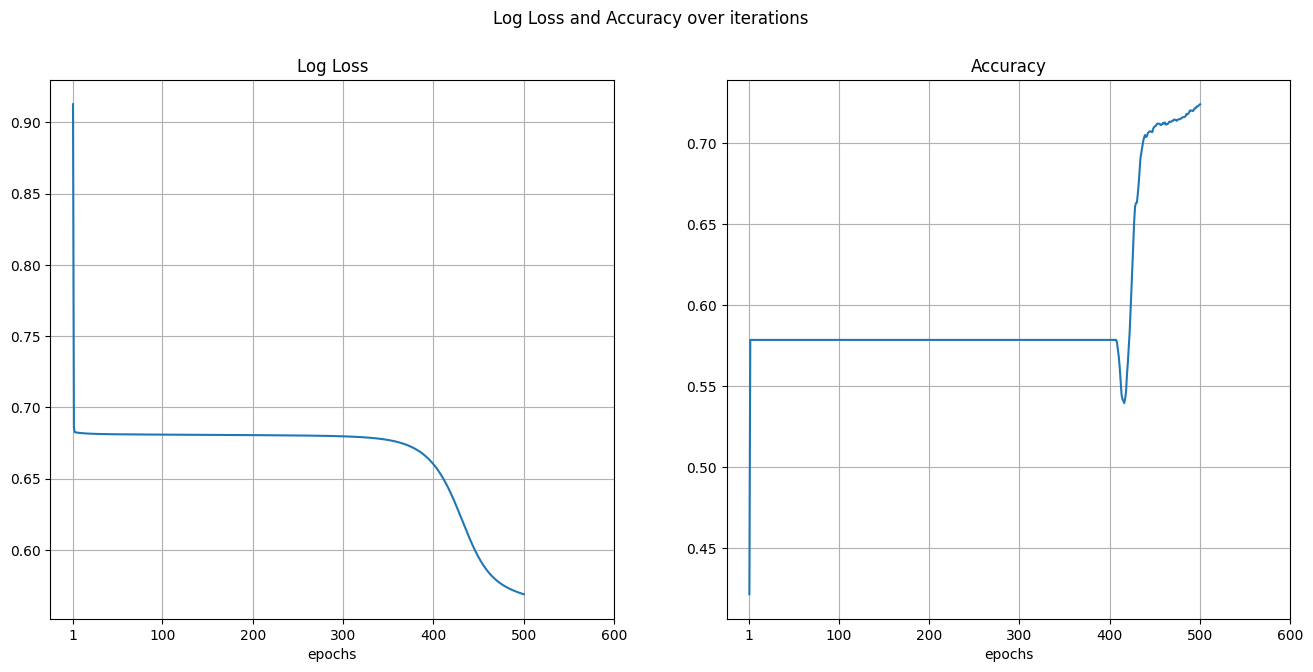

In [6]:
#### Initialize the network parameters
np.random.seed(12345)

W_1 = np.random.uniform(-1, 1, (x_mat_full.shape[-1], 3))
W_2 = np.random.uniform(-1, 1, (3, 1))
num_epochs = 500
learning_rate = 1e-3
x_mat = x_mat_full

loss_vals, accuracies = [], []
for i in range(1, num_epochs+1):
    ### Do a forward computation, and get the gradient
    y_pred, gradient = forward_pass(W_1, W_2, x_mat, y)
    ## Update the weight matrices
    W_1 -= learning_rate * gradient[0]
    W_2 -= learning_rate * gradient[1]
    ### Compute the loss and accuracy
    loss = loss_fn(y, y_pred)
    accuracy = np.mean((y_pred > 0.5).astype(int) == y)
    loss_vals.append(loss)
    accuracies.append(accuracy)
    ## Print the loss and accuracy for every 200th iteration
    if not i % 200:
        print('Epoch {}: loss = {:.4f}, accuracy = {:.4f}'.format(i, loss, accuracy))
plot_loss_accuracy(loss_vals, accuracies)

## <span style="color: green;">2. ปรับโครงสร้างโมเดลและค่า hyperparameter ที่เห็นสมควร พร้อมอธิบายสิ่งที่ได้ปรับและเหตุผล เพื่อให้โมเดลมีประสิทธิภาพที่ให้ค่า accuracy ไม่น้อยกว่า 95%</span>

In [ ]:
# def forward_pass(W, x_mat, y):
#     """
#     Does a forward computation of the neural network
#     Takes the input `x_mat` and produces the output `y_pred`
#     Also produces the gradient of the log loss function
#     """
#     gradient = [None] * len(W)
#     z, a = [], []
#     y_pred = None
#     for w in W:
#         z.append(np.dot(x_mat, w)) if not z else z.append(np.dot(a[-1], w))
#         a.append(sigmoid(z[-1])) if not w is not W[-1] else y_pred = sigmoid(z[-1]).reshape((len(x_mat), ))

#     J_out_grad = y_pred - y
#     a_z_grad = []
#     gradient = []
#     for i in range(len(W)-1, -1, -1):
#         if i == len(W) - 1:
#             J_w_grad = np.dot(J_out_grad, a[i-1]).reshape(-1, 1)
#         else:
#             J_w_grad = (np.dot((J_out_grad).reshape(-1, 1), W[i+1].reshape(-1, 1).T) * a_z_grad[-1]).T.dot(x_mat).T
#         gradient[i] = 
#         a_z_grad.append(sigmoid(z[i]) * (1 - sigmoid(z[i])))
#         J_out_grad = np.dot(J_out_grad.reshape(-1, 1), W[i].reshape(-1, 1).T) * a_z_grad[-1]

    # z_2 = np.dot(x_mat, W_1)
    # a_2 = sigmoid(z_2)
    # z_3 = np.dot(a_2, W_2)
    # y_pred = sigmoid(z_3).reshape((len(x_mat), ))
    # Now compute the gradient
    # J_z_3_grad = y_pred - y
    # J_W_2_grad = np.dot(J_z_3_grad, a_2).reshape(-1, 1)
    # a_2_z_2_grad = sigmoid(z_2)*(1-sigmoid(z_2))
    # J_W_1_grad = (np.dot((J_z_3_grad).reshape(-1, 1), W_2.reshape(-1, 1).T)*a_2_z_2_grad).T.dot(x_mat).T
    # gradient = (J_W_1_grad, J_W_2_grad)
    
    # return y_pred, gradient

## <span style="color: green;">3. ให้วาดกราฟของคลาส Positive และ Negative ที่ทำนายถูกและไม่ถูก และให้แสดง Confustion Matrix ดังตัวอย่างในรูป และให้เขียนอธิบายสิ่งที่สังเกตได้จากกราฟทั้งสอง</span>
![](https://drive.google.com/thumbnail?id=156xTSDBMlhHJBlVnBG2KvOeUt-reneE0&sz=w642)
![](https://drive.google.com/thumbnail?id=16lVXq3JWbGlw_QRx1_YWBQvMXL0DdsjH&sz=w482)

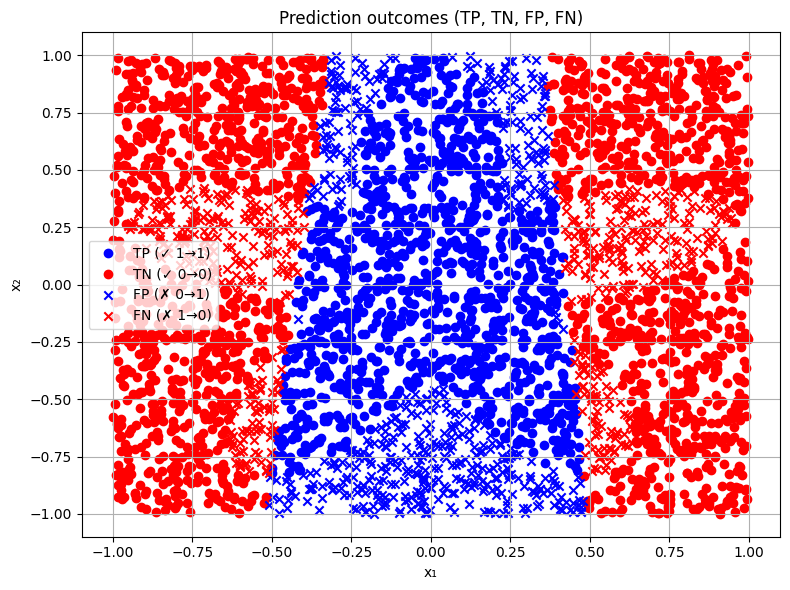

In [9]:
import matplotlib.pyplot as plt

def plot_confusion_points(x_mat, y, y_pred):
    """
    Plots data points and labels TP, TN, FP, FN with different symbols/colors.

    Args:
        x_mat: (n_samples, 2) input matrix
        y: true labels (0 or 1)
        y_pred: predicted probabilities
    """
    y_bin = (y_pred > 0.5).astype(int)

    TP = (y == 1) & (y_bin == 1)
    TN = (y == 0) & (y_bin == 0)
    FP = (y == 0) & (y_bin == 1)
    FN = (y == 1) & (y_bin == 0)

    plt.figure(figsize=(8, 6))
    plt.scatter(x_mat[TP, 0], x_mat[TP, 1], c='blue', marker='o', label='TP (✓ 1→1)')
    plt.scatter(x_mat[TN, 0], x_mat[TN, 1], c='red', marker='o', label='TN (✓ 0→0)')
    plt.scatter(x_mat[FP, 0], x_mat[FP, 1], c='blue', marker='x', label='FP (✗ 0→1)')
    plt.scatter(x_mat[FN, 0], x_mat[FN, 1], c='red', marker='x', label='FN (✗ 1→0)')

    plt.legend()
    plt.xlabel('x₁')
    plt.ylabel('x₂')
    plt.title('Prediction outcomes (TP, TN, FP, FN)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_confusion_points(x_mat, y, y_pred)

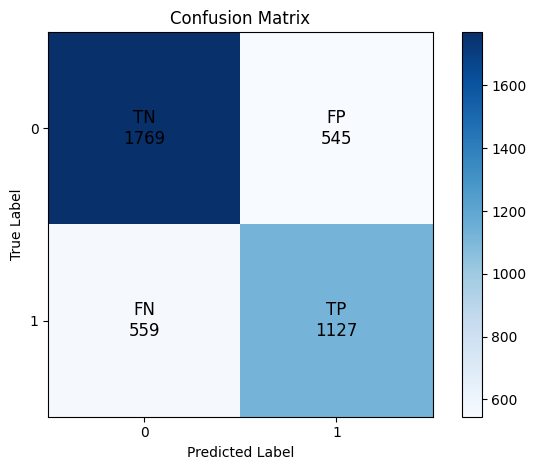

In [10]:
import matplotlib.pyplot as plt
import numpy as np

def plot_confusion_matrix(y_true, y_pred_probs, threshold=0.5):
    """
    Plots a 2x2 confusion matrix from predictions.

    Args:
        y_true: true labels (0 or 1), shape (n_samples,)
        y_pred_probs: predicted probabilities, shape (n_samples,)
        threshold: threshold for classifying probabilities
    """
    y_pred = (y_pred_probs > threshold).astype(int)

    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))

    conf_matrix = np.array([[TN, FP],
                            [FN, TP]])

    fig, ax = plt.subplots()
    im = ax.imshow(conf_matrix, cmap='Blues')

    # Label axes
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xticklabels(['0', '1'])
    ax.set_yticklabels(['0', '1'])
    ax.set_title('Confusion Matrix')

    # Annotate cells with counts
    for i in range(2):
        for j in range(2):
            label = ['TN', 'FP', 'FN', 'TP'][i * 2 + j]
            value = conf_matrix[i, j]
            ax.text(j, i, f'{label}\n{value}', ha='center', va='center', fontsize=12, color='black')

    plt.colorbar(im)
    plt.tight_layout()
    plt.show()

plot_confusion_matrix(y, y_pred, threshold=0.5)

## <span style="color: green;">4. ใช้โมเดลที่เทรนได้ค่า accuracy ตามที่โจทย์กำหนด ให้แสดงรายการข้อมูลที่โมเดลทำนายผิดของแต่ละคลาสมาอย่างละ 3 รายการ หรือหากมีจำนวนน้อยกว่า ให้แสดงเท่าที่มี</span>